In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import torch
import torchvision
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [2]:
def live_plot(loss, train_acc, valid_acc=None, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(loss, label='Training Loss', color='red')
    ax1.legend(loc='lower left')
    ax1.set_ylabel('Cross Entropy Loss')
    ax2 = ax1.twinx()
    ax2.plot(train_acc, label='Training Accuracy', color='green')
    if valid_acc is not None:
        ax2.plot(valid_acc, label='Validation Accuracy', color='blue')
    ax2.legend(loc='lower right')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_xlabel('Epoch')
    plt.title(title)
    plt.show()

In [3]:
df = pd.read_csv("heart.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Implement method to calculate a proper test_size split!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# define the x variables (all features except the target variable)
x = df.drop('target', axis=1)

# define the y variable (only the target variable)
y = df.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.5, random_state=0)

print("Training set size: ", xtrain.shape, f"/{xtrain.shape[0]} rows of data, {xtrain.shape[1]} columns of variables/")

Training set size:  (512, 13) /512 rows of data, 13 columns of variables/


In [5]:
# Data Standardization and why

# Data analysis



In [6]:
# Data processing

In [7]:
# Model Selection


In [8]:
# Linear Regression Model
linear_reg = Pipeline([("standardize", StandardScaler()),("linear_regression", LinearRegression())])

linear_reg = linear_reg.fit(xtrain,ytrain)

linear_reg_pred = linear_reg.predict(xtest) 

In [9]:
# Logistic Regression Model
logistic_reg = Pipeline([("standardize", StandardScaler()),("logistic_regression", LogisticRegression())])

logistic_reg = logistic_reg.fit(xtrain,ytrain)

logistic_reg_pred = logistic_reg.predict(xtest) 

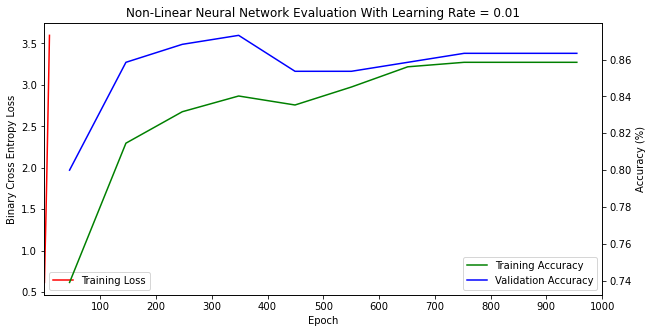

In [26]:
# Non Linear NN Model (Sigmoid)

# load data 
df = pd.read_csv("heart.csv")
x = df.drop("target",1).values
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=0)


# standardizing data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


x_t_train = torch.Tensor(x_train.astype(np.float32))
y_t_train = torch.Tensor(y_train.astype(np.float32))
x_t_test = torch.Tensor(x_test.astype(np.float32))
y_t_test = torch.Tensor(y_test.astype(np.float32))

y_t_train = y_t_train.view(y_t_train.shape[0],1)
y_t_test = y_t_test.view(y_t_test.shape[0],1)

class LogNNModel(torch.nn.Module):
    
    def __init__(self, n_input_features):
        super().__init__()
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=n_input_features, out_features=1)
        self.activation = torch.nn.Sigmoid()
    
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation(X)
        return X
    
n_samples, n_features = x_t_train.shape

# 1) Model
input_size = n_features
output_size = 1

nonlinear_nn_model = LogNNModel(n_features)

# 2) Loss and optimizer

learning_rates = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
lr = learning_rates[2]
optimizer = torch.optim.SGD(nonlinear_nn_model.parameters(), lr=1e-2)
criterion = torch.nn.BCELoss()
# 3) Training 

# performing with multiple iterations of varying learning rates and varying
# epoch lengths

epoch_list = [100, 200,300, 400,500, 600,700, 800, 900, 1000]

train_acc = []
valid_acc = []
loss_cel = []

for epoch_iter in epoch_list:
        epoch_loss = 0
        for epoch in range(epoch_iter):

            y_pred = nonlinear_nn_model(x_t_train)

            loss = criterion(y_pred, y_t_train)

            loss.backward()
            
            optimizer.step()

            optimizer.zero_grad()
        
            epoch_loss += loss.item()
        
        with (torch.no_grad()): 

            # training accuracy
            y_predn = nonlinear_nn_model(x_t_train)
            y_predn = y_predn.round()
    
            train_acc.append(accuracy_score(y_true = y_t_train, y_pred = y_predn))
          
            # Binary Cross Entropy Loss
            celi = epoch_loss
            loss_cel.append(celi/100.25)            
           
            # validation accuracy
            y_pred_val = nonlinear_nn_model(x_t_test)
            y_pred_val = y_pred_val.round()
            
            valid_acc.append(accuracy_score(y_true = y_t_test, y_pred = y_pred_val))
              
clear_output(wait=True)
fig, ax1 = plt.subplots(figsize=(10,5))     


x_axis = np.linspace(100, 1000, 10)
ax1.plot(loss_cel, label = "Training Loss", c="red")

ax1.legend(loc='lower left')
ax1.set_ylabel('Binary Cross Entropy Loss')
ax2 = ax1.twinx()
ax2.plot(train_acc, label="Training Accuracy", color='green')
ax2.plot(valid_acc, label = "Validation Accuracy", c="blue")
ax2.legend(loc = "lower right")
ax2.set_ylabel('Accuracy (%)')
ax1.set_xlabel('Epoch')
ax1.set_xticks(x_axis)
plt.title(f"Non-Linear Neural Network Evaluation With Learning Rate = {lr}")
plt.show()


Text(0, 0.5, 'Cross Entropy Loss')

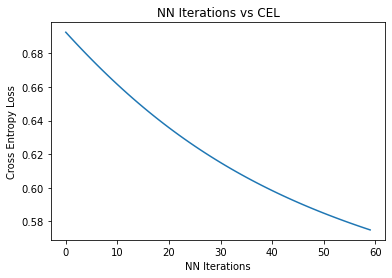

In [54]:
class LinearModel(torch.nn.Module):
    
    def __init__(self, num_features, num_classes):
        
        super().__init__()
        
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=num_classes)
        self.activation1 = torch.nn.Sigmoid()
        
    def forward(self, X):
        X = self.dense1(X)  
        X = self.activation1(X)
        return X
    
df = pd.read_csv("heart.csv")

X = df.drop("target", 1).astype('float').values
y = df.target.values

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state = 0)

scale = StandardScaler()
Xs = scale.fit_transform(xtrain)
Xts = scale.transform(xtest)
Xtrain = torch.FloatTensor(Xs)
Xtest = torch.FloatTensor(Xts)

Ytrain = torch.LongTensor(ytrain)
Ytest = torch.LongTensor(ytest)

nnl = LinearModel(13,2)
optimizer = torch.optim.SGD(nnl.parameters(), lr=1e-1)
criterion = torch.nn.CrossEntropyLoss()
y_pred = nnl.forward(Xtrain)

loss_list = []
lr_list = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epoch_list = [100, 200,300, 400,500, 600,700, 800, 900, 1000]

for lr in lr_list:
    for epoch in epoch_list:
        
        # intializes the gradient to 0
        optimizer.zero_grad()
        # calculates and stores outputs of nn
        y_pred = nnl.forward(Xtrain)
        # criterion is the loss function
        loss = criterion(input=y_pred, target = Ytrain)
        loss_list.append(loss)
        # computes gradient of the loss
        loss.backward()
        optimizer.step()
        
plt.plot(loss_list)
plt.xlabel("NN Iterations")
plt.title("NN Iterations vs CEL")
plt.ylabel("Cross Entropy Loss")


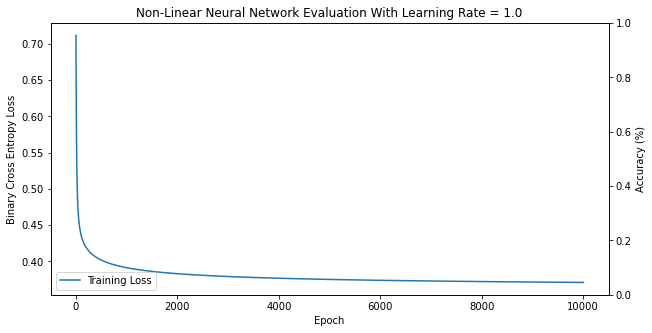

<Figure size 432x288 with 0 Axes>

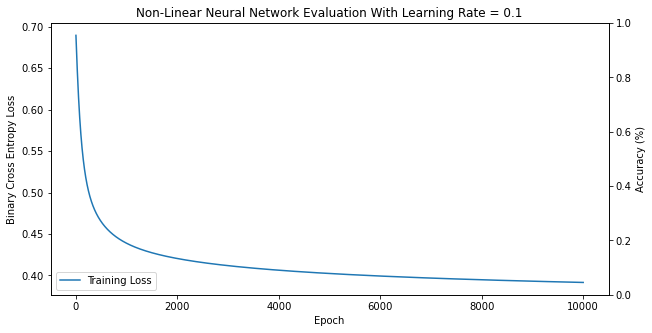

<Figure size 432x288 with 0 Axes>

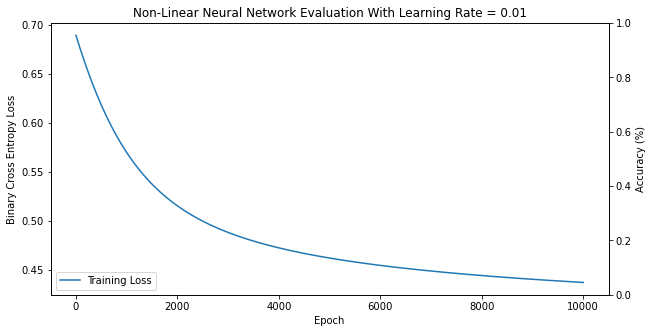

<Figure size 432x288 with 0 Axes>

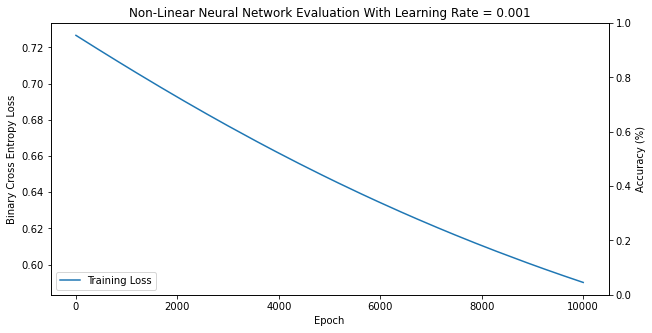

<Figure size 432x288 with 0 Axes>

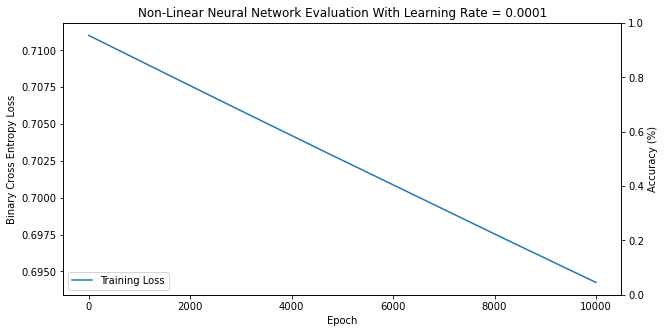

<Figure size 432x288 with 0 Axes>

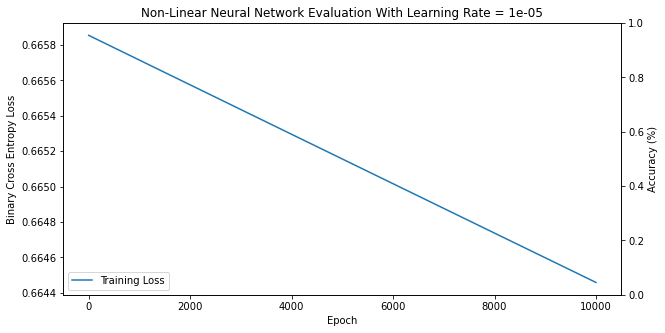

<Figure size 432x288 with 0 Axes>

In [98]:
class LinearModel(torch.nn.Module):
    
    def __init__(self, num_features, num_classes):
        
        super().__init__()
        
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=num_classes)
        self.activation1 = torch.nn.Sigmoid()
        
    def forward(self, X):
        X = self.dense1(X)  
        X = self.activation1(X)
        return X
    
df = pd.read_csv("CAN.csv")

X = df.drop("Label", 1).astype('float').values
y = df.Label.values

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state = 0)

scale = StandardScaler()
Xs = scale.fit_transform(xtrain)
Xts = scale.transform(xtest)
Xtrain = torch.FloatTensor(Xs)
Xtest = torch.FloatTensor(Xts)

Ytrain = torch.LongTensor(ytrain)
Ytest = torch.LongTensor(ytest)



train_acc = []
valid_acc = []
loss_cel = []

lr_list = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epoch = 10000






for lr in lr_list:
    
    nnl = LinearModel(9,2)
    criterion = torch.nn.CrossEntropyLoss()
    y_pred = nnl.forward(Xtrain)
    optimizer = torch.optim.SGD(nnl.parameters(), lr=lr)

    clear_output(wait=True)
    fig, ax1 = plt.subplots(figsize=(10,5))   
    x_axis = np.linspace(100, 1000, 10)
    loss_cel=[]
    
    for ep in range(epoch):
        epochloss=0
        # intializes the gradient to 0
        optimizer.zero_grad()
        # calculates and stores outputs of nn
        y_pred = nnl.forward(Xtrain)
        # criterion is the loss function
        loss = criterion(input=y_pred, target = Ytrain)

        # computes gradient of the loss
        loss.backward()
        optimizer.step()

        epochloss+=loss.item()
        with torch.no_grad():

            # Cross Entropy Loss
            ypce = nnl.forward(Xtrain)
            loss_cel.append(epochloss)
            
            # Training Acc
            ypta = nnl.forward(Xtrain)
            

            # Validation Acc




    ax1.plot(loss_cel, label = "Training Loss")
    ax1.legend(loc='lower left')
    ax1.set_ylabel('Binary Cross Entropy Loss')
    ax2 = ax1.twinx()
#     ax2.plot(train_acc, label="Training Accuracy", color='green')
#     ax2.plot(valid_acc, label = "Validation Accuracy", c="blue")
#     ax2.legend(loc = "lower right")
    ax2.set_ylabel('Accuracy (%)')
    ax1.set_xlabel('Epoch')
    
    plt.title(f"Non-Linear Neural Network Evaluation With Learning Rate = {lr}")
    plt.figure()

In [13]:
# Non-Linear Neural Network Model
# With one hidden layer

class NonLinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=400)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=400, out_features=num_classes)
        self.activation2 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

In [14]:
# Convolutional Neural Network Model

class ConvNet(torch.nn.Module):
     
    def __init__(self, h, w, outputs):
        super(ConvNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = torch.nn.BatchNorm2d(16)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = torch.nn.BatchNorm2d(32)
        self.conv3 = torch.nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = torch.nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = torch.nn.Linear(linear_input_size, outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = torch.nn.functional.relu(self.bn1(self.conv1(x)))
        x = torch.nn.functional.relu(self.bn2(self.conv2(x)))
        x = torch.nn.functional.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))


In [15]:
# Regularization

In [16]:
# Set up performance calculator
def perform_cfv(model, scorer):
    sc = make_scorer(scorer)
    return cross_val_score(model, x, y, cv=5, scoring=sc)

def model_performance(ytest, ypred, model, scorer):

    if ("linear_regression" in model.named_steps):
        cfv = perform_cfv(model, scorer)
        return [mean_squared_error(ytest,ypred),np.round(cfv,4), np.round(cfv.mean(),4)]
    elif("logistic_regression" in model.named_steps):

        classes = model.named_steps.logistic_regression.classes_
        # true positive (correctly guessed patient had heart disease when they did)
        tp = sum(np.logical_and(ypred == classes[1], ytest == classes[1]))
        # true negative (correctly guessed patient did not have heart disease when they did not)
        tn = sum(np.logical_and(ypred == classes[0], ytest == classes[0]))
        # false positive (incorrectly guessed patient had heart disease when they did not)
        fp = sum(np.logical_and(ypred == classes[1], ytest == classes[0]))
        # false negative (incorrectly guessed patient did not have heart disease when they did)
        fn = sum(np.logical_and(ypred == classes[0], ytest == classes[1]))

        # correct predictions / all predictions 
        # percentage of correct predictions
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        # true positives / (true positives + false positives)
        # evaluates the proportion of positive identifications that were guessed correctly
        precision = (tp) / (tp + fp)

        # true positives / (true positives + false negatives)
        # evaluates the proportion of actual positives that were identified correctly
        sensitivity = (tp) / (tp + fn)

        specificity = (tn) / ( tn + fp)

        cfv = perform_cfv(model, scorer)

        return [np.round(accuracy,4), np.round(sensitivity,4), np.round(specificity,4), np.round(precision,4), np.round(cfv,4), np.round(cfv.mean(),4)] 
    elif (model.named_steps.linear_nn):
        pass
    elif (model.named_stepsmodel.named_steps.nonlinear_nn):
        pass
    elif (model.named_steps.covnn):
        pass


In [17]:
# Model Performance Visualizations

# Linear Regression Model Visual
linear_performance = model_performance(ytest, linear_reg_pred, linear_reg, mean_squared_error)
print(f"MSE: {np.round(linear_performance[0],4)}, Average MSE of model: %{np.round(linear_performance[2]*100,4)}")

# Logistic Regression Model Visual

logistic_performance = model_performance(ytest, logistic_reg_pred, logistic_reg, mean_squared_error)
print(f"Logistic Regression - Accuracy: {logistic_performance[0]}, Sensitivity: {logistic_performance[1]}, Specificity: {logistic_performance[2]}, Precision: {logistic_performance[3]}, Average MSE of model: %{np.round(logistic_performance[5]*100,4)}\n")

# Linear Neural Network Model Visual
# Non-Linear Neural Network Model Visual
# Convolutional Neural Network Model Visual

ValueError: Found input variables with inconsistent numbers of samples: [205, 513]

In [ ]:
# Model Performance
